In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
df_1 = pd.read_csv("C:\\Users\\youss\\OneDrive\\Documents\\kaggle\\House Prices - advanced Regression Techniques\\train.csv")
df_2 = pd.read_csv("C:\\Users\\youss\\OneDrive\\Documents\\kaggle\\House Prices - advanced Regression Techniques\\test.csv")
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis = 0)
df = df.set_index('Id')

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index] 
print (df_null.shape)

(2919, 28)


In [21]:
df_null.head()

,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,AllPub,VinylSd,VinylSd,196.0,Gd,TA,No,GLQ,...,Gd,Typ,Attchd,2003.0,RFn,2.0,548.0,TA,TA,WD
2,RL,80.0,AllPub,MetalSd,MetalSd,0.0,Gd,TA,Gd,ALQ,...,TA,Typ,Attchd,1976.0,RFn,2.0,460.0,TA,TA,WD
3,RL,68.0,AllPub,VinylSd,VinylSd,162.0,Gd,TA,Mn,GLQ,...,Gd,Typ,Attchd,2001.0,RFn,2.0,608.0,TA,TA,WD
4,RL,60.0,AllPub,Wd Sdng,Wd Shng,0.0,TA,Gd,No,ALQ,...,Gd,Typ,Detchd,1998.0,Unf,3.0,642.0,TA,TA,WD
5,RL,84.0,AllPub,VinylSd,VinylSd,350.0,Gd,TA,Av,GLQ,...,Gd,Typ,Attchd,2000.0,RFn,3.0,836.0,TA,TA,WD


<Axes: ylabel='Id'>

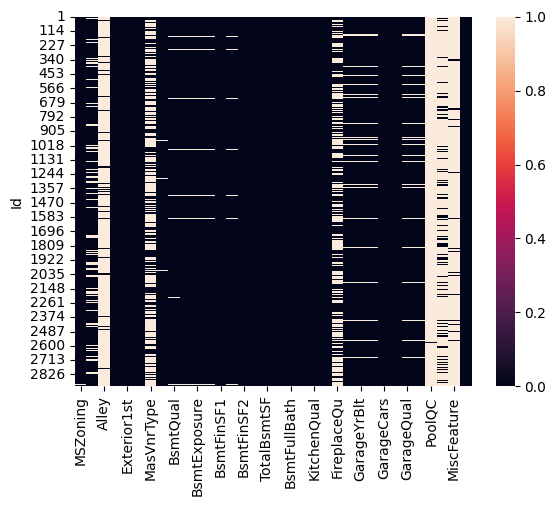

In [10]:
sns.heatmap(df_null.isnull())

In [17]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [26]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)

In [27]:
df_objects.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [30]:
df_objects['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
null          4
Name: count, dtype: int64

In [29]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [32]:
for i in df_objects_encoded.columns:
    if 'null' in  i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [33]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [34]:
len(new_df.columns)

304

In [38]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [40]:
df_objects_encoded['MSZoning_C (all)'].value_counts()

MSZoning_C (all)
False    2894
True       25
Name: count, dtype: int64

In [41]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis=1 )

new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [42]:
len(new_df.columns)

267

In [45]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'Fireplaces', 'TotRmsAbvGrd', 'BedroomAbvGr', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'OverallQual', 'OverallCond', ]
Mean_columns = ['LotFrontage', 'MasVnrArea', 'MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold', 'MiscVal', 'MoSold'] 

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]


Series([], dtype: int64)

In [47]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [49]:
len(new_df)

2919

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
x = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
Y_train = np.reshape(Y_train, (-1,1))
Y_test = np.reshape(Y_test, (-1,1))
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

In [57]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)


615582972.7466481

In [65]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
model_2.fit(X_train, Y_train)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

477257728.0

In [70]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(X_train, Y_train)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


541527479.4483749

Let's try now with all the data: (x,y)

In [72]:
model_1 = LinearRegression()
model_1.fit(x, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)


301239200.8488913

In [109]:
model_2 = XGBRegressor(n_estimators=900, learning_rate=0.1)
model_2.fit(x, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

12643.5458984375

In [83]:
model_2 = XGBRegressor(n_estimators=2500, learning_rate=0.1)
model_2.fit(x, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

0.035039979964494705

In [77]:
model_3 = RandomForestRegressor(n_estimators=10000)
model_3.fit(x, y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

73658763.00273955

In [79]:
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(x, y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

74788210.48102899

Model_2 has the best score with n_estimators=900

Let's plot the data

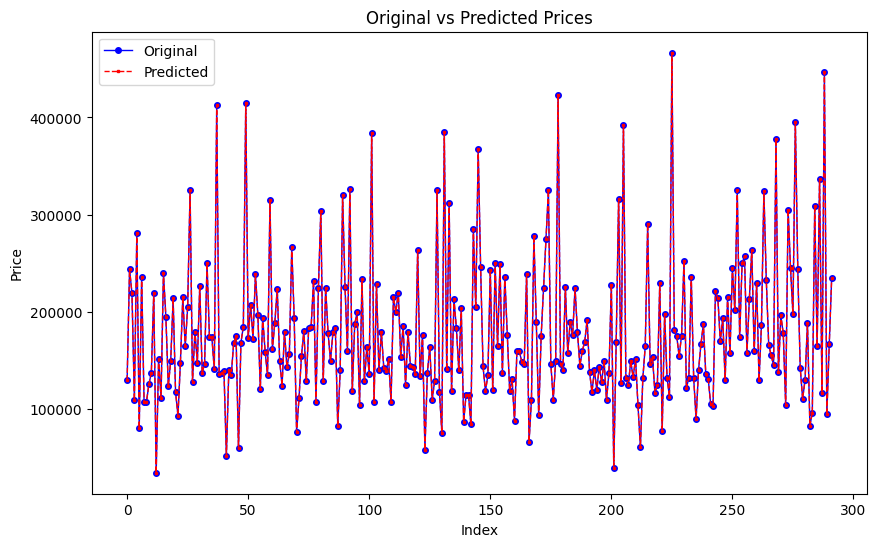

In [94]:
sort_indices = np.argsort(Y_test)

#plot
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original', linestyle='-', linewidth=1, color='blue', marker='o', markersize=4)
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', linestyle='--', linewidth=1, color='red', marker='s', markersize=2)
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()


In [110]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['id'] = testing_data.index
final['SalePrice'] = pred

#Write Data frame to a csv file without index
final.to_csv('output.csv', index=False)